In [10]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
dtypes = {'date': 'str', 'us': 'int', 'world': 'int', 'uk':int}
parse_dates = ['date']
#data = pd.read_csv("1.csv", index_col=0, dtype=dtypes, parse_dates=parse_dates)
data = pd.read_csv("1.csv")
print(data["us"])

0         1
1         1
2         4
3         3
4         2
       ... 
233     459
234     933
235    1135
236     841
237     953
Name: us, Length: 238, dtype: int64


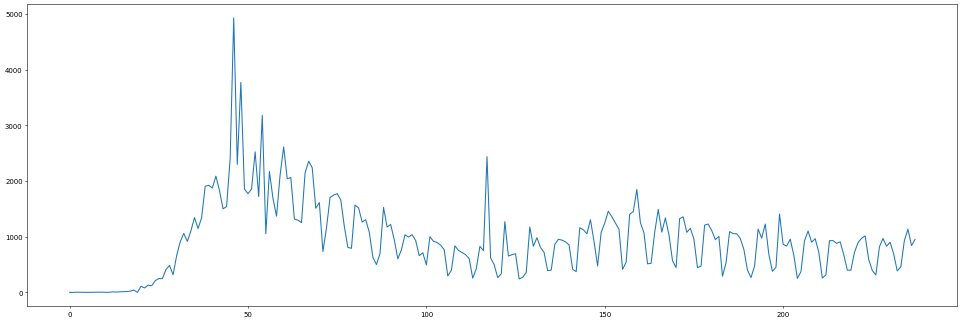

In [33]:
plt.figure(figsize=(24, 8), dpi=50)
plt.plot(data['us'])

In [34]:
x = -0.37727

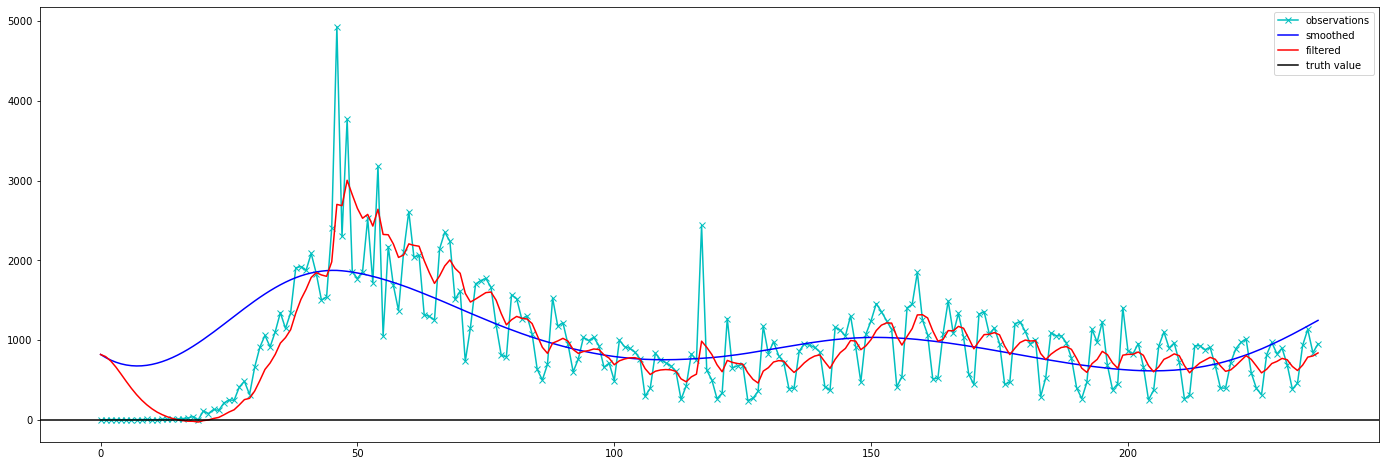

In [37]:
from pykalman import KalmanFilter

observations = data['us']

kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.0000001*np.eye(2))

smoothed_states_pred = kf.em(observations).smooth(observations)[0]
filtered_states_pred = kf.em(observations).filter(observations)[0]

#plt.plot(observations)

plt.figure(figsize=(24, 8))
plt.plot(observations, "-xc", label="observations")
plt.plot(smoothed_states_pred[:, 0], "b", label="smoothed")
plt.plot(filtered_states_pred[:, 0], "r", label="filtered")
plt.axhline(x, color="k", label="truth value")
plt.legend()
plt.show()